#Pytorch computer vision

#3 0. Computer vision libraries in PyTorch

* torchvision - base domain library for computer vision
* torchvision.datasets - get datasets and data loading functions for computer vision here
* torchvision.models - get pretrained computer vision models that you can leverage for your own problem
* torchvision.transforms - function for manipulating your vision data(images) to be suitable for use with an ML model
* torch.utils.data.Dataset - Base dataset class for PyTorch

In [ ]:
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#import matplotlib for visiualiation
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


### 1. Getting a dataset
The dataset we will be using is a FashionMNIST from torchvision.datasets

In [ ]:
train_data = datasets.FashionMNIST(
    root='data', #where to download data to
    train=True, #do we want training data set
    download=True, #do we want to download it
    transform=torchvision.transforms.ToTensor(),#how do we want to transform the data
    target_transform=None #how do we want to transform labels
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None

)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 348kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.22MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 6.67MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.2 Visualiing our data

In [ ]:
class_names = train_data.classes


IMage shape: torch.Size([1, 28, 28])


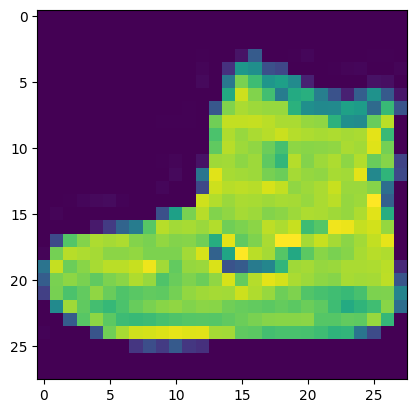

In [ ]:
image,label = train_data[0]
print(f"IMage shape: {image.shape}")
plt.imshow(image.squeeze())

##2. Prepare data loader
Dataloader turns our dataset into a python iterable

Specifically we want to turn our data into batches (or mini-batches)

In [ ]:
from torch.utils.data import DataLoader

#Setup the batch sie hyparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c6ef4fe18e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c6ef51c9cd0>)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])
tensor(8) torch.Size([])


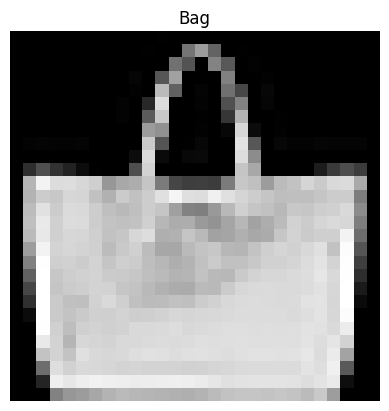

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(img.shape)
print(label, label.shape)

## 3. Model 0 : Build a baseline model
A baseline model is a simple model you will try and improve upon with subsequent models.

In order word start simply and add complexity when necessary

In [ ]:
#Creaye a flatten layer
flatten_model = nn.Flatten() # Instantiate the Flatten layer

# Get a single sample
x = train_features_batch[0]


# Flatten the sample
output = flatten_model(x) #perform forward pass

print(x.shape)
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)

    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape = 784,
    hidden_units=10,
    output_shape = len(class_names) #one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters())

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

two of te min things you will often want to track
1. Models performance
2. how fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f'train time on {device} : {total_time : .3f} seconds')

In [ ]:
start_time = timer()
#some code ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

train time on cpu :  0.000 seconds


## 3.3 Creating a training loop and training a model on baches on data

1. Loop through epochs.
2. loop through training batches, perform training steps, calculate the train loss *per batch*
3. loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's hapeenung
5. Time it all

In [ ]:
# Import tqdm for a progress bar
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (keeep it small for faster training time)
epochs = 3

#create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n-----")
  ### Traning
  train_loss = 0
  # Add a loop to loop through the trining batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. forward pass
    y_pred = model_0(X)

    # 2. calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss

    # 3. optimizer zero grad
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #Print out what's happening
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

  #divide train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ###Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)
  print(f"\nTrain loss : {train_loss: .4f} | Test loss : {test_loss: .4f}, Test acc : {test_acc: .4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device =str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss :  1.9379 | Test loss :  1.5435, Test acc :  62.4201
Epoch : 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss :  1.2492 | Test loss :  1.0609, Test acc :  66.1542
Epoch : 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss :  0.9507 | Test loss :  0.8914, Test acc :  69.9980
train time on cpu :  37.829 seconds


## Make predictions and get Model 0 results

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__,
          'model_loss': loss.item(),
            'model_acc': acc}
model_0.to(device) # Move model_0 to the target device
model_0_results = eval_model(model=model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.8913663625717163,
 'model_acc': 69.99800319488818}

### 5. Setup device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1 : Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr= 0.1)

### 6.2 Functioning training and evaluation/testing loops

Let us creat a function for:
* training loop - train_step()
* testing loop - test_step()

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0,0
  #put model into training model
  model.train()
  # Add a loop to loop through the trining batches
  for batch, (X,y) in enumerate(data_loader):
    #put data on target device
    X, y = X.to(device), y.to(device)

    #1. forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # 3. optimizer zero grad
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  #divide train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss: .5f}| Train acc : {train_acc: .5f}')


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                           y_pred= test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test loss : {test_loss: .5f} | Test acc : {test_acc: .2f} %\n')


In [ ]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

#set epochs
epochs = 3

# Create a optimiation and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-----')
  train_step(model=model_1,
             data_loader = train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model = model_1,
            data_loader= test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn= accuracy_fn,
            device=device)
  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start= train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss:  1.09199| Train acc :  61.34333
Test loss :  0.95636 | Test acc :  65.00 %

train time on cpu :  12.231 seconds
Epoch: 1
-----
Train loss:  0.78101| Train acc :  71.92833
Test loss :  0.72227 | Test acc :  73.91 %

train time on cpu :  23.871 seconds
Epoch: 2
-----
Train loss:  0.67027| Train acc :  75.93667
Test loss :  0.68500 | Test acc :  75.02 %

train time on cpu :  35.079 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.8913663625717163,
 'model_acc': 69.99800319488818}

In [ ]:
total_train_time_model_0

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader=test_dataloader,
                             accuracy_fn=accuracy_fn,
                             loss_fn = loss_fn)

## Model 2: Building a Convolutional Neural Network (CNN)

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2



FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [ ]:
rand_image_tensor = torch.randn(1, 28,28)
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [ ]:
torch.manual_seed(42)

images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]

print(f'Image batch shape : {images.shape}')
print(f"single image shape : {test_image.shape} ")
print(f'test image : {test_image}')

Image batch shape : torch.Size([32, 3, 64, 64])
single image shape : torch.Size([3, 64, 64]) 
test image : tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310

In [ ]:
# Create a single convd layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size= (3, 3),
                       stride=1,
                       padding = 0,
                       )

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[-0.4432, -0.4266, -0.7313,  ..., -0.3842, -0.4029, -0.2580],
          [-0.5172, -0.6280, -0.5067,  ..., -0.5455, -0.2697, -0.3392],
          [-0.6129, -0.4303, -0.3513,  ..., -0.2895, -0.3527, -0.5661],
          ...,
          [-0.4673, -0.3827, -0.3777,  ..., -0.5011, -0.5698, -0.2990],
          [-0.3849, -0.4654, -0.5875,  ..., -0.7656, -0.4689, -0.4657],
          [-0.5404, -0.1720, -0.1813,  ..., -0.7557, -0.5228, -0.5067]],

         [[-0.5316, -0.1805, -0.3830,  ..., -0.3040,  0.1747, -0.1271],
          [-0.0159, -0.2488, -0.2986,  ..., -0.0356, -0.2788, -0.3086],
          [-0.2891, -0.4163, -0.3072,  ..., -0.2823, -0.1784, -0.3035],
          ...,
          [-0.3779, -0.1186, -0.1976,  ..., -0.0708, -0.1470, -0.2759],
          [ 0.0127,  0.0269, -0.0898,  ..., -0.1350, -0.1111, -0.4801],
          [-0.3296,  0.0213,  0.0134,  ..., -0.3110, -0.2932, -0.3754]],

         [[ 0.4062,  0.3490,  0.5550,  ...,  0.5446,  0.4686,  0.3256],
          [ 0.5676,  0.5045,  

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
print(test_image.unsqueeze(0).shape)

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(test_image_through_conv.shape)

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(test_image_through_conv_and_max_pool.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 10, 62, 62])
torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
#create a random number with a similar number of dimenstion
random_tensor=torch.randn(1,1,2,2)
print(random_tensor.shape)
#create a max pool later
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(max_pool_tensor)
print(max_pool_tensor.shape)
random_tensor

torch.Size([1, 1, 2, 2])
tensor([[[[0.3367]]]])
torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [ ]:
##7.3 Setup a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss:  0.59518| Train acc :  78.37500
Test loss :  0.39500 | Test acc :  85.99 %

Epoch: 1
---------
Train loss:  0.36536| Train acc :  86.90167
Test loss :  0.35244 | Test acc :  86.91 %

Epoch: 2
---------
Train loss:  0.32588| Train acc :  88.12833
Test loss :  0.32719 | Test acc :  88.07 %

train time on cpu :  179.260 seconds


In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,

)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_2_results])

compare_results


,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.891366,69.998003
1,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs  = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

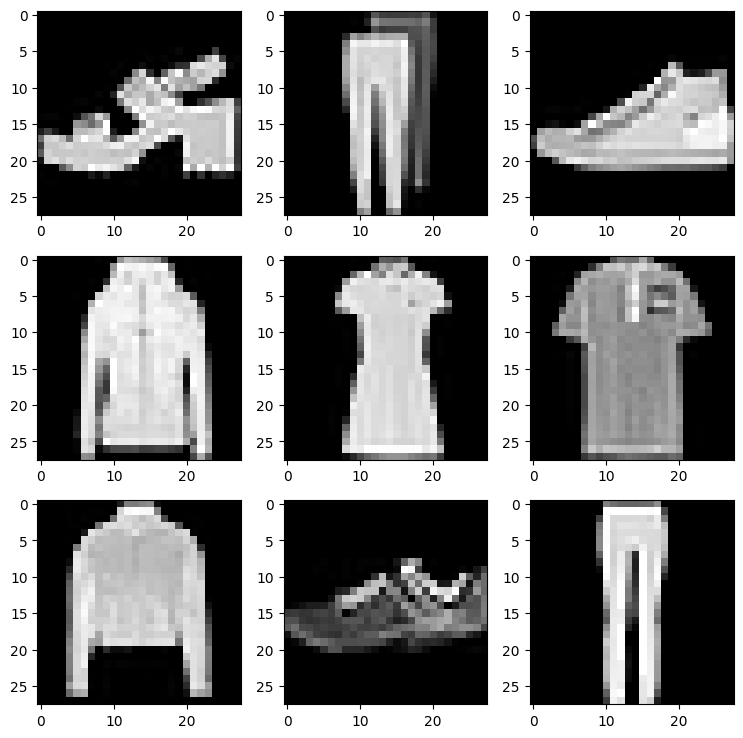

In [ ]:
#plot predicitons
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap='gray')

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_test = f""

## 10. Making a confusion matrix for further predicton

In [ ]:
pip install torchmetrics -U mlextend

ERROR: Could not find a version that satisfies the requirement mlextend (from versions: none)
ERROR: No matching distribution found for mlextend
